In [1]:
import itertools
import random

import axelrod as axl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import skopt
import tqdm
from skopt.plots import plot_convergence

//anaconda3/envs/opt-mo/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import sqlalchemy as sa
import pandas as pd

In [3]:
from functools import partial

In [4]:
from scipy import stats

In [5]:
import opt_mo

In [6]:
font = {"size": 11,"weight": "bold"}
matplotlib.rc("font", **font)


Numerical Experiments
---------------------

An example of the Bayesion optimisation and the change of the utility over the iterations.

In [7]:
def bayesian(opponents, n_calls=60):
    method_params = {"n_random_starts": 20, "n_calls": n_calls}
    bounds = [(0, 1.0) for _ in range(4)]
    objective = opt_mo.memory_one_best_response.prepare_objective_optimisation(
        opponents=opponents
    )

    result = skopt.gp_minimize(
        func=objective,
        dimensions=bounds,
        acq_func="EI",
        random_state=0,
        **method_params
    )

    return result

In [8]:
opponents = [[1/3, 1/3, 1/3, 1/3], [1/3, 1/3, 1/3, 1/3]]

In [9]:
res = bayesian(opponents)

In [10]:
values = np.minimum.accumulate(res.func_vals, 0)
values = [-x for x in values]

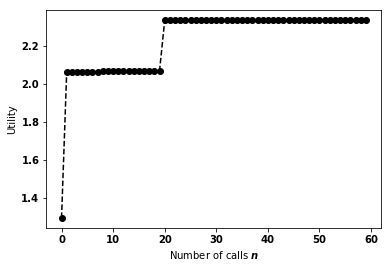

In [11]:
fig, ax = plt.subplots()

plt.plot(range(len(values)), values, "--o", color='black')
plt.xlabel("Number of calls $n$",)
plt.ylabel(r"Utility");

fig.savefig('../img/bayesian_example.pdf')

Best response dynamics algorithm
-----------------------------------------

In [12]:
axl.seed(2)
random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]

In [13]:
initial = np.array([1, 1, 1, 1])
best_ev_response, history, _ = opt_mo.get_evolutionary_best_response(
        random_opponents, opt_mo.get_memory_one_best_response, initial=initial
    )

Next generation.
Next generation.
Next generation.
Next generation.


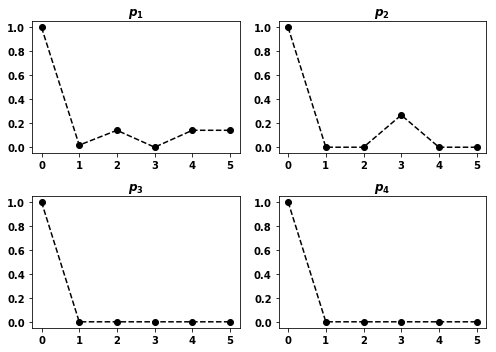

In [14]:
points = [[hist[i] for hist in history] for i in range(4)]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))

for i in range(4):
    
    axes = (int(i / 2), i % 2)
    
    ax[axes].plot(points[i], linestyle="--", marker="o", color="black"),
    ax[axes].set_title(r"$p_{}$".format(i + 1))
    ax[axes].set_ylim(-0.05, 1.05)

fig.tight_layout()

fig.savefig('../img/best_response_dynamics_example.pdf')

# Memory-one best responses in $N=2$

In [11]:
color = matplotlib.cm.viridis(0.3)

In [12]:
df = pd.read_csv('../data/numerical_experiments_without_gambler.csv', index_col=0) #read_sql_data_frame('../data/data/without_gambler/the_main.db')

In [13]:
df.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,mem_one_cycle_length,reactive_p_1,reactive_p_2,reactive_p_3,reactive_p_4,evol_reactive_p_1,evol_reactive_p_2,evol_reactive_p_3,evol_reactive_p_4,reactive_cycle_length
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.487114,0.507529,0.506513,0.496405,0.520443,0.500516,0.506080,0.493446,0.268355,...,3.575000,0.053408,0.100361,0.053408,0.100361,0.051514,0.026964,0.051514,0.026964,1.271000
std,288.819436,0.290850,0.286879,0.289602,0.291581,0.291042,0.282002,0.287517,0.287634,0.412731,...,53.461599,0.221819,0.220163,0.221819,0.220163,0.220051,0.087560,0.220051,0.087560,3.719327
min,0.000000,0.001186,0.000426,0.000538,0.001145,0.000254,0.000210,0.000403,0.000720,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,249.750000,0.225239,0.252376,0.254374,0.247647,0.261301,0.264528,0.262221,0.248554,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,499.500000,0.487043,0.522296,0.519162,0.478272,0.515770,0.498159,0.515061,0.487578,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,749.250000,0.735435,0.751023,0.763515,0.764454,0.774857,0.731178,0.749466,0.750983,0.570298,...,2.000000,0.000000,0.036286,0.000000,0.036286,0.000000,0.000000,0.000000,0.000000,1.000000
max,999.000000,0.998462,0.998575,0.999550,0.999766,0.998728,0.999653,0.999129,0.998740,1.000000,...,1690.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999809,1.000000,0.999809,117.000000


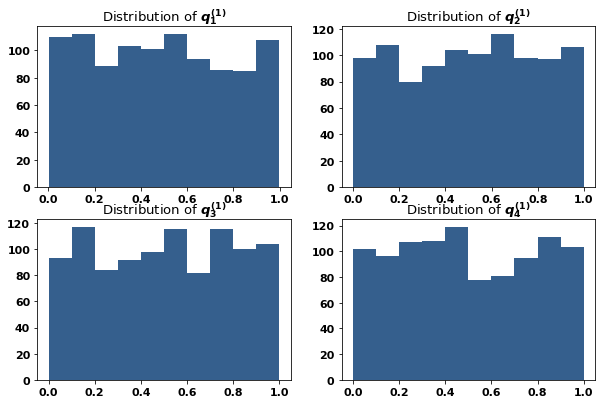

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)
    axes[index].hist(df['first_opponent_q_{}'.format(i + 1)], color=color)
    
    axes[index].set_title('Distribution of $q^{(1)}_%s$' % (i + 1))

plt.savefig('../img/first_opponent_probabilities.pdf')

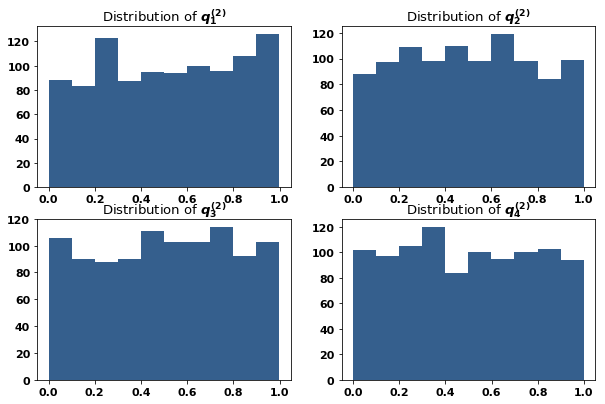

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)
    #axes[index].hist(df['first_opponent_q_{}'.format(i + 1)], color=colors[0], label='$q^{(1)}$')
    axes[index].hist(df['second_opponent_q_{}'.format(i + 1)], color=color);
    
    axes[index].set_title('Distribution of $q^{(2)}_%s$' % (i + 1))

plt.savefig('../img/second_opponent_probabilities.pdf')

**SSerror analysis**

In [16]:
df["is_ZD"] = df.apply(
    lambda row: opt_mo.tools.is_ZD(
        vector=[
            row["mem_one_p_1"],
            row["mem_one_p_2"],
            row["mem_one_p_3"],
            row["mem_one_p_4"],
        ]
    ),
    axis=1,
)
df["SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["mem_one_p_1"],
            row["mem_one_p_2"],
            row["mem_one_p_3"],
            row["mem_one_p_4"],
        ]
    ),
    axis=1,
)

//anaconda3/envs/opt-mo/lib/python3.6/site-packages/opt_mo-0.0.1-py3.6.egg/opt_mo/tools.py:98: RuntimeWarning: invalid value encountered in double_scalars


In [17]:
sum(df["is_ZD"]), max(df["SSerror"]), min(df["SSerror"])

(0, 2.4705882352941178, 0.0)

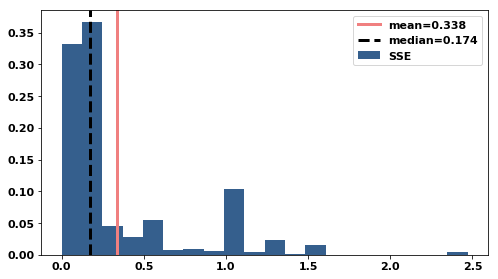

In [18]:
fig, axes = plt.subplots(figsize=(8, 4.5))

weights = np.ones_like(df["SSerror"]) / len(df["SSerror"])

axes.hist(df["SSerror"], weights=weights, bins=20, color=color, label='SSE',);
axes.axvline(
    np.mean(df["SSerror"]), color="lightcoral", linewidth=3,
    label="mean=%s" % round(np.mean(df["SSerror"]), 3)
)
#axes.set_xticks(np.linspace(0, 2.5, 6))

axes.axvline(
    np.median(df["SSerror"]),
    color="black",
    linestyle="dashed",
    linewidth=3,
    label="median=%s" % round(np.median(df["SSerror"]), 3),
)
axes.legend();

plt.savefig('../img/best_respones_sserror.pdf')

In [19]:
def describe(df, stats):
    d = df.describe(percentiles=[.05, .25, .5, .95])
    return d.append(df.reindex_axis(d.columns, 1).agg(stats))

In [20]:
sserror_table = pd.DataFrame(describe(df, ['median', 'skew', 'kurt'])['SSerror'])
with open("../tex/sserror_table.tex", "w") as f:
    f.write(sserror_table.round(5).to_latex().replace('SSerror', 'SSE'))

//anaconda3/envs/opt-mo/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Memory-one best responses in evolutionary dynamics

In [21]:
df["evol_is_ZD"] = df.apply(
    lambda row: opt_mo.tools.is_ZD(
        vector=[
            row["evol_mem_one_p_1"],
            row["evol_mem_one_p_2"],
            row["evol_mem_one_p_3"],
            row["evol_mem_one_p_4"],
        ]
    ),
    axis=1,
)
df["evol_SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["evol_mem_one_p_1"],
            row["evol_mem_one_p_2"],
            row["evol_mem_one_p_3"],
            row["evol_mem_one_p_4"],
        ]
    ),
    axis=1,
)


//anaconda3/envs/opt-mo/lib/python3.6/site-packages/opt_mo-0.0.1-py3.6.egg/opt_mo/tools.py:98: RuntimeWarning: invalid value encountered in double_scalars


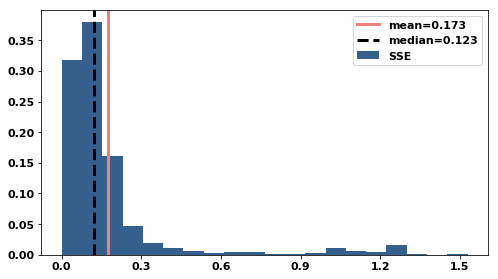

In [24]:
fig, axes = plt.subplots(figsize=(8, 4.5))

weights = np.ones_like(df["evol_SSerror"]) / len(df["evol_SSerror"])

axes.hist(df["evol_SSerror"], weights=weights, bins=20, color=color, label='SSE',);
axes.axvline(
    np.mean(df["evol_SSerror"]), color="lightcoral", linewidth=3,
    label="mean=%s" % round(np.mean(df["evol_SSerror"]), 3)
)
axes.set_xticks(np.linspace(0, 1.5, 6))
axes.axvline(
    np.median(df["evol_SSerror"]),
    color="black",
    linestyle="dashed",
    linewidth=3,
    label="median=%s" % round(np.median(df["evol_SSerror"]), 3)
)
axes.legend();

plt.savefig('../img/evo_sserror.pdf')

In [27]:
evo_sserror_table = pd.DataFrame(pd.DataFrame(describe(df, ['median', 'skew', 'kurt'])['evol_SSerror']))
with open("../tex/evo_sserror_table.tex", "w") as f:
    f.write(evo_sserror_table.round(5).to_latex().replace('evol\\_SSerror', 'SSE'))

//anaconda3/envs/opt-mo/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


**Compairing behaviour based on the transition probabilities**

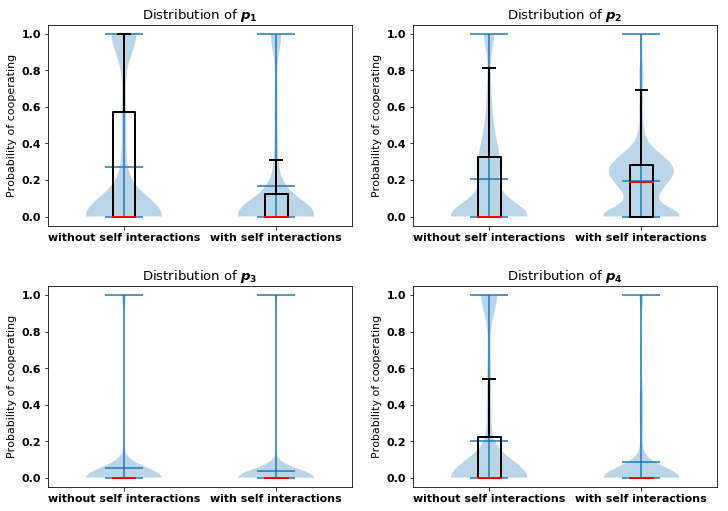

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8.5))

for i in range(4):
    index = (int(i / 2), i % 2)

    axes[index].violinplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]],
        showmeans=True,
    )
    boxes = axes[index].boxplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]], showfliers=False
    )
    for bp in boxes['medians']:
        bp.set_color('red')
        bp.set_linewidth(2)
    for bp in boxes['caps']:
        bp.set_color('black')
        bp.set_linewidth(2)
    for bp in boxes['whiskers']:
        bp.set_color('black')
        bp.set_linewidth(2)
    for bp in boxes['boxes']:
        bp.set_color('black')
        bp.set_linewidth(2)

    axes[index].set_title('Distribution of $p_%s$' % (i + 1), fontweight= 'medium')
    axes[index].set_ylabel('Probability of cooperating', fontweight= 'medium')
    matplotlib.pyplot.subplots_adjust(wspace = 0.2, hspace = 0.3)

    plt.setp(axes[index], xticks=[1, 2], xticklabels=["without self interactions", "with self interactions"])
    
plt.savefig('../img/behaviour_violin_plots.pdf')

In [29]:
def test_ranksum(sample_one, sample_two, alpha=0.05):
    _, p = stats.ranksums(df['SSerror'], df['evol_SSerror'])
    
    if p > alpha:
        print(r'Fail to reject $h_0$')
    else:
        print(r'Reject $h_0$')
    return p

In [30]:
means = []
for i in range(4):
    means.append((np.median(df['mem_one_p_{}'.format(i + 1)]),
                  np.median(df['evol_mem_one_p_{}'.format(i + 1)]),
                  round(test_ranksum(df['mem_one_p_{}'.format(i + 1)],
                                     df['evol_mem_one_p_{}'.format(i + 1)]), 3)))

Reject $h_0$
Reject $h_0$
Reject $h_0$
Reject $h_0$


In [31]:
tests_table = pd.DataFrame(means, columns=['Τournament', 'Evolutionary Settings',
                                           'p-values'])
tests_table['Best Response Median in:'] = ['Distribution $p_1$', 'Distribution $p_2$',
                                           'Distribution $p_3$', 'Distribution $p_4$']
cols = ['Best Response Median in:', 'Τournament', 'Evolutionary Settings', 'p-values']
tests_table = tests_table[cols] 

In [32]:
with open("../tex/medians_tests.tex", "w") as f:
    f.write(tests_table.to_latex().replace('\$', '$').replace('\_', '_'))

# Longer Memory best responses

In [33]:
df_with_gambler = pd.read_csv('../data/numerical_experiments_with_gambler.csv', index_col=0)

In [34]:
df_with_gambler.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,gambler_paramater_p_8,gambler_paramater_p_9,gambler_paramater_p_10,gambler_paramater_p_11,gambler_paramater_p_12,gambler_paramater_p_13,gambler_paramater_p_14,gambler_paramater_p_15,gambler_paramater_p_16,gambler_utility
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,...,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,222.006579,0.496166,0.526187,0.515755,0.485457,0.479285,0.496915,0.500785,0.503991,0.235871,...,0.458872,0.040698,0.100797,0.516725,0.530939,0.187211,0.213768,0.513726,0.483528,3.138946
std,119.567737,0.297573,0.284231,0.305119,0.291342,0.274775,0.287901,0.295686,0.279098,0.406602,...,0.393160,0.195388,0.290219,0.415512,0.420228,0.372434,0.384336,0.391865,0.407165,0.567000
min,0.000000,0.006326,0.000426,0.001495,0.012198,0.000452,0.000210,0.000616,0.016723,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.980030
25%,111.750000,0.223500,0.295591,0.253701,0.246691,0.232415,0.245250,0.259982,0.240404,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.017140,0.000000,0.000000,0.058378,0.028802,2.705146
50%,234.500000,0.482649,0.549494,0.536256,0.451088,0.492475,0.524128,0.496904,0.505170,0.000000,...,0.416211,0.000000,0.000000,0.559907,0.584099,0.000000,0.000000,0.523236,0.494375,3.154630
75%,326.250000,0.768124,0.769123,0.764458,0.763881,0.703374,0.730059,0.764875,0.750211,0.272583,...,0.848015,0.000000,0.000000,0.998510,1.000000,0.000000,0.183390,0.941299,0.966961,3.551105
max,364.000000,0.979050,0.982372,0.999550,0.998631,0.998728,0.996817,0.999129,0.998740,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.377580


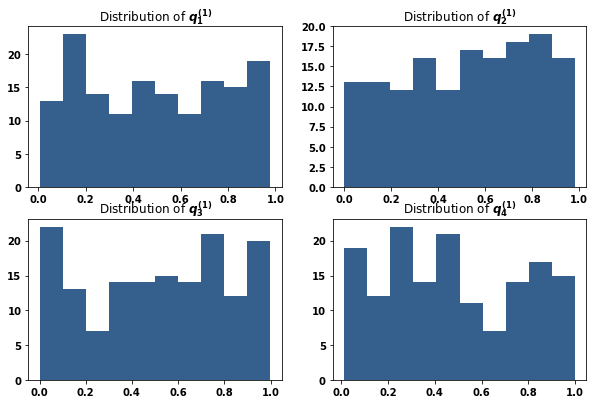

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)
    axes[index].hist(df_with_gambler['first_opponent_q_{}'.format(i + 1)], color=color)
    
    axes[index].set_title('Distribution of $q^{(1)}_%s$' % (i + 1))
    
plt.savefig('../img/first_opponent_probabilities_with_gambler.pdf')

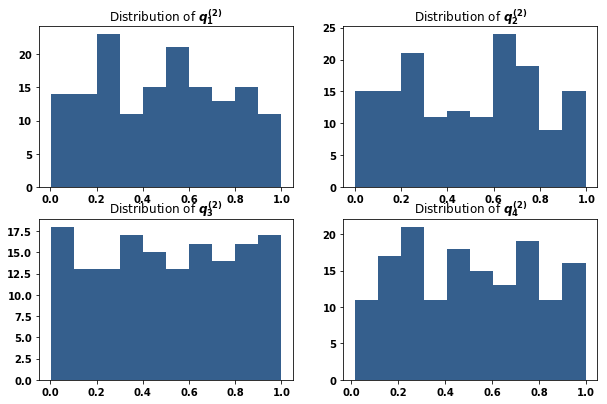

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)
    #axes[index].hist(df['first_opponent_q_{}'.format(i + 1)], color=colors[0], label='$q^{(1)}$')
    axes[index].hist(df_with_gambler['second_opponent_q_{}'.format(i + 1)], color=color);
    
    axes[index].set_title('Distribution of $q^{(2)}_%s$' % (i + 1))

plt.savefig('../img/second_opponent_probabilities_with_gambler.pdf')

In [37]:
utility = []
x = []
for i, row in df_with_gambler.iterrows():
    x.append(i)
    p = (row["mem_one_p_1"], row["mem_one_p_2"], row["mem_one_p_3"], row["mem_one_p_4"])
    q_1 = (
        row["first_opponent_q_1"],
        row["first_opponent_q_2"],
        row["first_opponent_q_3"],
        row["first_opponent_q_4"],
    )
    q_2 = (
        row["second_opponent_q_1"],
        row["second_opponent_q_2"],
        row["second_opponent_q_3"],
        row["second_opponent_q_4"],
    )
    utility.append(opt_mo.tournament_utility(p, [q_1, q_2]))

In [38]:
df_with_gambler["mem_one_utility"] = utility
x = range(len(df_with_gambler["gambler_utility"]))

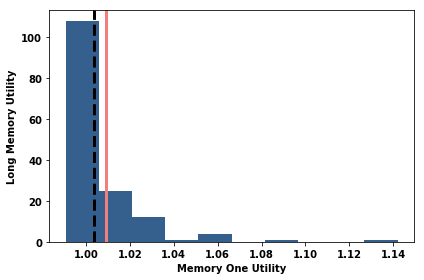

In [39]:
fig, axes = plt.subplots()

ratio = df_with_gambler["gambler_utility"] / df_with_gambler["mem_one_utility"]

# plt.scatter(df_with_gambler["mem_one_utility"],
#             df_with_gambler["gambler_utility"],
#             label="Gambler(2, 1, 1)", color=color);

plt.hist(ratio, color=color)

axes.axvline(
    np.median(ratio),
    color="black",
    linestyle="dashed",
    linewidth=3,
    label="median=%s" % round(np.median(ratio), 3)
)

axes.axvline(
    np.mean(ratio), color="lightcoral", linewidth=3,
    label="mean=%s" % round(np.mean(ratio), 3)
)

plt.ylabel("Long Memory Utility", fontsize=10, fontweight="bold")
plt.xlabel("Memory One Utility", fontsize=10, fontweight="bold");

fig.tight_layout()

plt.savefig('../img/gambler_performance_against_mem_one.pdf')